In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# ذخیره نتایج تحلیل گراف‌ها
ws_graphs_info = []

In [3]:
# تعریف سه مجموعه پارامتر مختلف
params = [
    (100, 4, 0.1),     # گراف 1
    (200, 6, 0.3),     # گراف 2
    (300, 8, 0.05),    # گراف 3
]

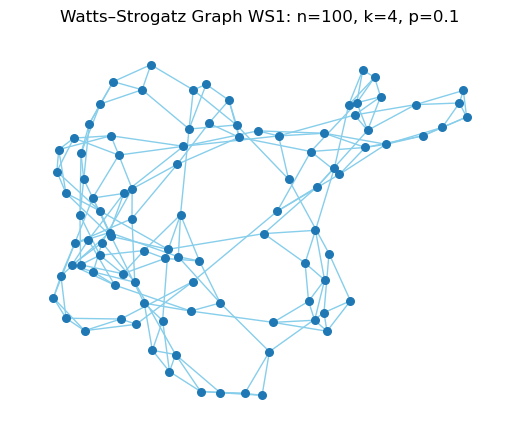

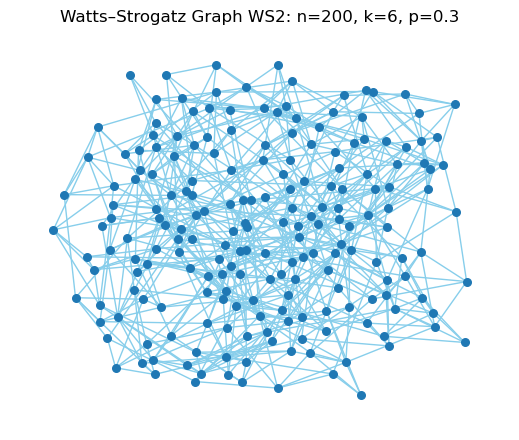

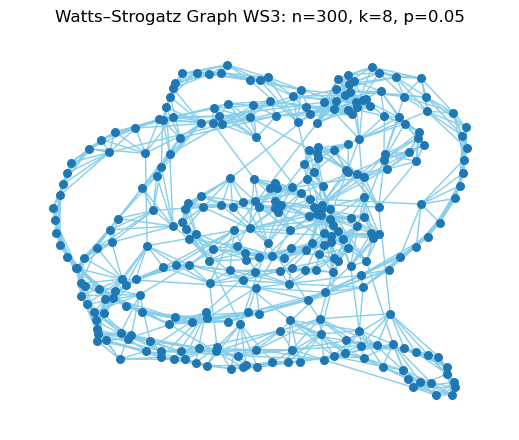

In [4]:
# ساخت و تحلیل گراف‌ها
for i, (n, k, p) in enumerate(params):
    G = nx.watts_strogatz_graph(n=n, k=k, p=p, seed=42)

    # محاسبه پارامترها
    N = G.number_of_nodes()
    L = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / N
    clustering = nx.average_clustering(G)
    if nx.is_connected(G):
        avg_path = nx.average_shortest_path_length(G)
        diameter = nx.diameter(G)
    else:
        avg_path = diameter = "Disconnected"

    ws_graphs_info.append({
        'Graph': f"WS{i+1}",
        'Nodes (N)': N,
        'Edges (L)': L,
        'Avg Degree <k>': round(avg_degree, 2),
        'Clustering Coeff': round(clustering, 4),
        'Avg Path Length': avg_path,
        'Diameter': diameter,
    })

    # رسم گراف
    plt.figure(figsize=(5, 4))
    nx.draw_spring(G, node_size=30, edge_color='skyblue')
    plt.title(f"Watts–Strogatz Graph WS{i+1}: n={n}, k={k}, p={p}")
    plt.show()

In [6]:
# نمایش جدول نتایج
df_ws = pd.DataFrame(ws_graphs_info)
df_ws

,Graph,Nodes (N),Edges (L),Avg Degree <k>,Clustering Coeff,Avg Path Length,Diameter
0,WS1,100,200,4.0,0.3830,4.906465,10
1,WS2,200,600,6.0,0.2145,3.448040,6
2,WS3,300,1200,8.0,0.5680,4.936477,10
